In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [4]:
train_df = pd.read_csv("salaries.csv")

In [5]:
X = train_df[['yearsExperience']]
y = train_df['salary']

In [6]:
split_ratios = [0.5, 0.4, 0.3, 0.2]  # test sizes
results = []

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


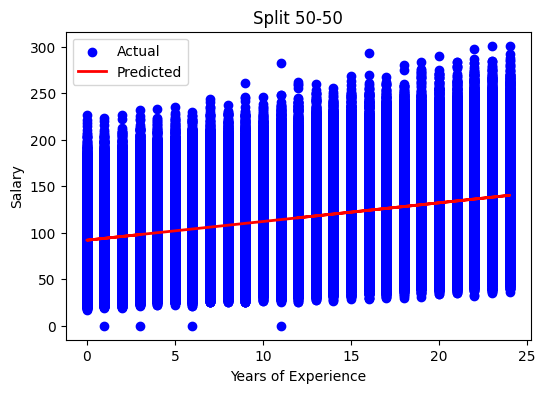

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


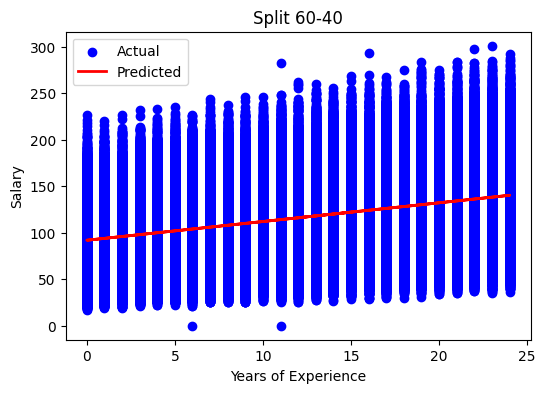

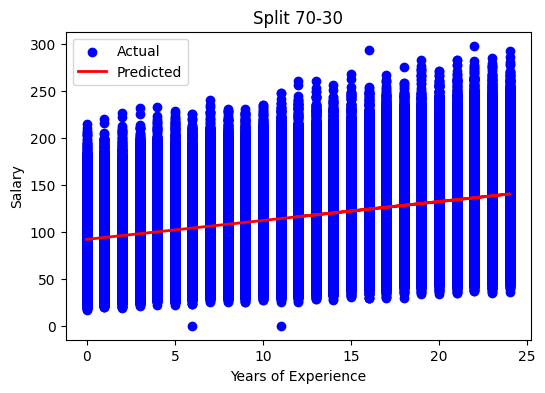

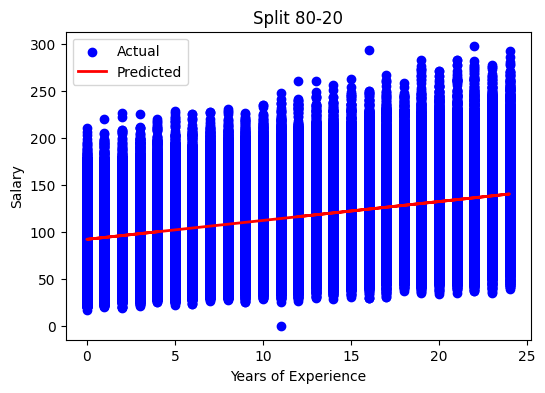

In [7]:
for test_size in split_ratios:
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Error metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Store results
    results.append({
        "Train %": int((1-test_size)*100),
        "Test %": int(test_size*100),
        "MAE": round(mae, 2),
        "MSE": round(mse, 2),
        "RMSE": round(rmse, 2)
    })

    # Visualization for each split
    plt.figure(figsize=(6,4))
    plt.scatter(X_test, y_test, color='blue', label="Actual")
    plt.plot(X_test, y_pred, color='red', linewidth=2, label="Predicted")
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary")
    plt.title(f"Split {int((1-test_size)*100)}-{int(test_size*100)}")
    plt.legend()
    plt.show()

Error Metrics for Different Splits:
   Train %  Test %    MAE      MSE   RMSE
0       50      50  28.84  1287.94  35.89
1       60      40  28.85  1288.84  35.90
2       70      30  28.90  1292.35  35.95
3       80      20  28.90  1291.46  35.94


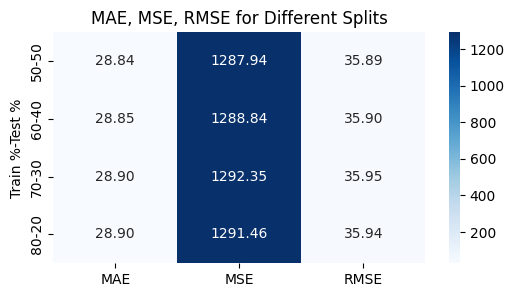

In [8]:
results_df = pd.DataFrame(results)
print("Error Metrics for Different Splits:")
print(results_df)

# Optional: Seaborn table-style heatmap
plt.figure(figsize=(6,3))
sns.heatmap(results_df.set_index(['Train %','Test %']), annot=True, fmt=".2f", cmap="Blues")
plt.title("MAE, MSE, RMSE for Different Splits")
plt.show()